# WGAN-GP Faces Train

In [1]:
import zipfile
import os
import torch as t
import matplotlib.pyplot as plt
from tqdm import tqdm
from google_drive_downloader import GoogleDriveDownloader as gdd
from models.GAN import build_generator, build_critic
from utils.data.FaceDataset import FaceDataset

In [2]:
# this will take some time :), its 1.3gb to download
faces_zip = 'data/faces.zip'
if not os.path.exists(faces_zip):
    gdd.download_file_from_google_drive(file_id='0B7EVK8r0v71pZjFTYXZWM3FlRnM',
                                        dest_path=faces_zip)
    with zipfile.ZipFile(faces_zip, 'r') as zip_ref:
        zip_ref.extractall('data/faces')

bs, z_dim = 64, 100

ds = FaceDataset("data/faces/img_align_celeba/", img_sizes=[64, 64], limit=8000)
dl = t.utils.data.DataLoader(dataset=ds, batch_size=bs, shuffle=True, drop_last=True)

In [3]:
generator = build_generator(gen_init_size=(128, 8, 8), gen_upsample_flags=[True, True, True, False],
                            gen_c=[128, 64, 32, 3], gen_ks=[5, 5, 5, 5], gen_strides=[1, 1, 1, 1],
                            gen_pads=[2, 2, 2, 2], z_dim=z_dim, output_act=t.nn.Tanh,
                            leaky_relu=True, first_gen_c=128)

critic = build_critic(ds[0][0][None], critic_c=[3, 32, 64, 128, 128], critic_ks=[5, 5, 5, 5],
                      critic_strides=[2, 2, 2, 1], critic_pads=[2, 2, 2, 2], wgan=True, wgan_gp=True, leaky_relu=True)

g_opt = t.optim.Adam(generator.parameters(), lr=5e-5, betas=(.0, .999))
c_opt = t.optim.Adam(critic.parameters(), lr=5e-5, betas=(.0, .999))
device = t.device('cuda') if t.cuda.is_available() else 'cpu'
generator.cuda(device)
critic.cuda(device)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (1): LeakyReLU(negative_slope=0.2)
  (2): Dropout(p=0.4)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (4): LeakyReLU(negative_slope=0.2)
  (5): Dropout(p=0.4)
  (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (7): LeakyReLU(negative_slope=0.2)
  (8): Dropout(p=0.4)
  (9): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (10): LeakyReLU(negative_slope=0.2)
  (11): Dropout(p=0.4)
  (12): Flatten()
  (13): Linear(in_features=8192, out_features=1, bias=True)
)

In [4]:
def plot_tensor(x):
    _, ax = plt.subplots(figsize=(3, 3))
    def image2np(image):
        res = image.permute(1, 2, 0)
        return res[..., 0] if res.shape[2] == 1 else res
    ax.imshow(image2np(t.from_numpy(x.cpu().detach().numpy())), cmap="viridis", alpha=None)
    plt.show()

In [5]:
def gradient_penalty(critic, real, gen):
    alpha = t.randn(bs, 1, 1, 1).to(device)
    interpolates = (alpha * real + (1 - alpha) * gen).requires_grad_(True)
    c_interpolates = critic(interpolates)

    gradients = t.autograd.grad(
        outputs=c_interpolates,
        inputs=interpolates,
        grad_outputs=t.ones(bs, 1).to(device),
        create_graph=True
    )[0]

    gradients = gradients.view(gradients.size(0), -1)
    return ((gradients.norm(dim=1) - 1) ** 2).mean()

  0%|          | 0/2000 [00:00<?, ?it/s]/home/p/.installed_software/anaconda3/lib/python3.7/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
 20%|█▉        | 399/2000 [6:44:52<26:17:08, 59.11s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


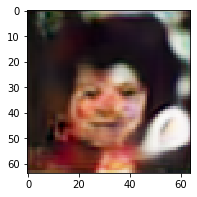

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


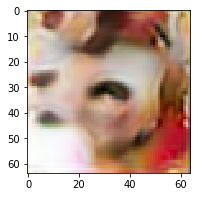

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


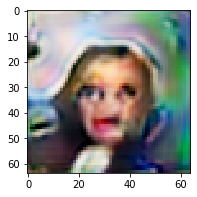

 40%|███▉      | 799/2000 [13:19:36<19:46:47, 59.29s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


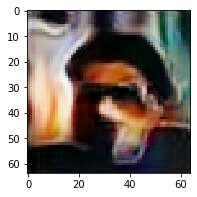

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


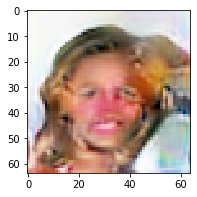

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


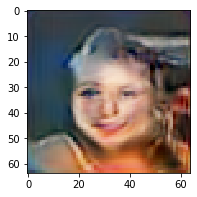

 60%|█████▉    | 1199/2000 [19:54:43<13:07:32, 58.99s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


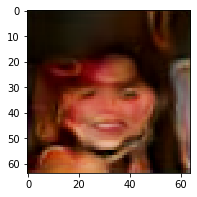

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


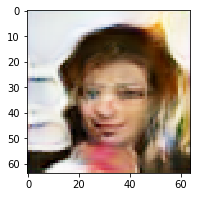

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


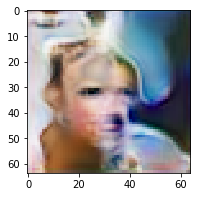

 80%|███████▉  | 1599/2000 [28:56:02<9:03:26, 81.31s/it] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


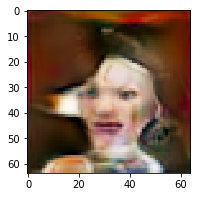

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


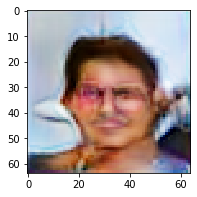

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


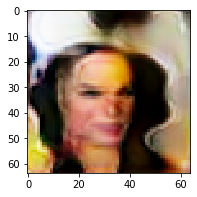

100%|█████████▉| 1999/2000 [36:21:59<01:00, 60.36s/it]  Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


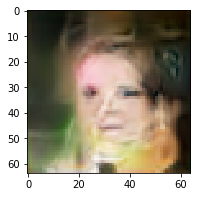

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


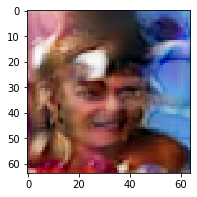

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


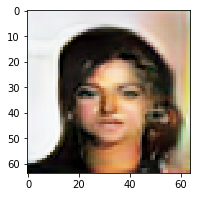

100%|██████████| 2000/2000 [36:22:59<00:00, 60.48s/it]


In [6]:
for epoch in tqdm(range(1, 2001)):
    for i, (imgs, _) in enumerate(dl):
        # train critic
        real_imgs = imgs.to(device)
        randn = t.randn(bs, z_dim)
        gen_imgs = generator(randn.to(device))

        c_opt.zero_grad()
        ri_pred = critic(real_imgs)
        gi_pred = critic(gen_imgs)
        gp = gradient_penalty(critic, real_imgs.data, gen_imgs.data)
        gp_lambda = 10 # hyperparam
        c_loss = -t.mean(ri_pred) + t.mean(gi_pred) + gp_lambda * gp
        c_loss.backward()
        c_opt.step()

        # train generator
        if i % 5 == 0:
            gen_imgs = generator(randn.to(device))
            g_opt.zero_grad()
            gi_critic_pred = critic(gen_imgs)
            g_loss = -t.mean(gi_critic_pred)
            g_loss.backward()
            g_opt.step()

    if epoch % 400 == 0:
        for img in generator(t.randn(3, z_dim).to(device)):
            plot_tensor(img)

In [7]:
# train more below

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

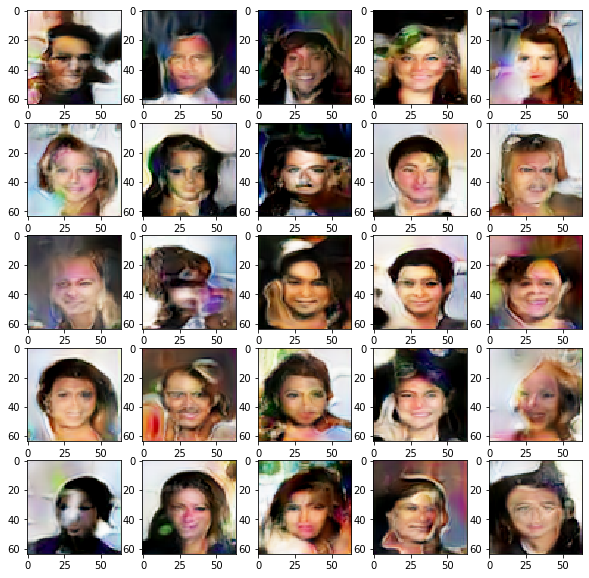

In [8]:
row, col = 5, 5

f, axarr = plt.subplots(row, col, figsize=(10, 10))

for r in range(row):
    for c in range(col):
        images = generator(t.randn(2, z_dim).to(device)).cpu().detach()[0].permute(1, 2, 0)
        axarr[r, c].imshow(images)

 20%|█▉        | 399/2000 [4:39:42<18:53:35, 42.48s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


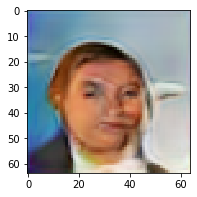

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


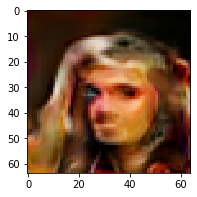

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


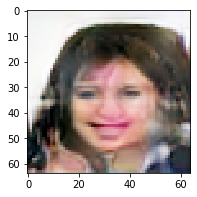

 40%|███▉      | 799/2000 [9:22:59<14:06:36, 42.29s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


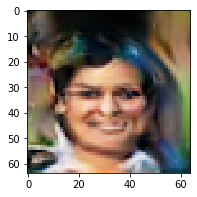

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


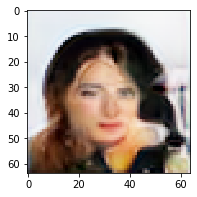

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


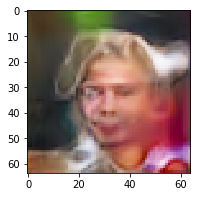

 60%|█████▉    | 1199/2000 [12:12:09<4:24:23, 19.80s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


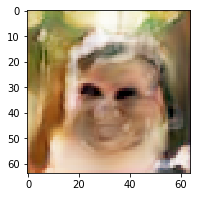

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


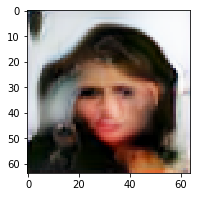

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


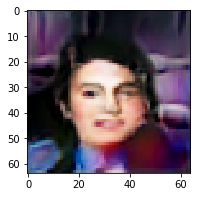

 80%|███████▉  | 1599/2000 [14:24:44<2:13:25, 19.96s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


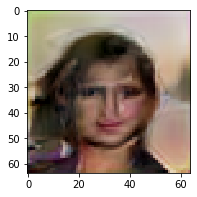

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


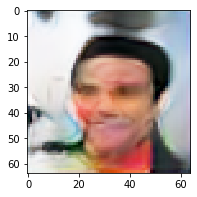

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


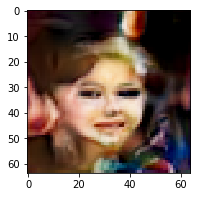

100%|█████████▉| 1999/2000 [16:37:26<00:20, 20.02s/it]  Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


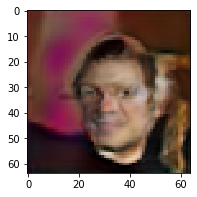

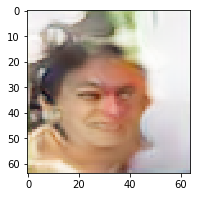

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


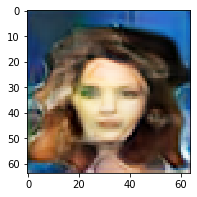

100%|██████████| 2000/2000 [16:37:47<00:00, 20.16s/it]


In [11]:
for epoch in tqdm(range(1, 2001)):
    for i, (imgs, _) in enumerate(dl):
        # train critic
        real_imgs = imgs.to(device)
        randn = t.randn(bs, z_dim)
        gen_imgs = generator(randn.to(device))

        c_opt.zero_grad()
        ri_pred = critic(real_imgs)
        gi_pred = critic(gen_imgs)
        gp = gradient_penalty(critic, real_imgs.data, gen_imgs.data)
        gp_lambda = 10 # hyperparam
        c_loss = -t.mean(ri_pred) + t.mean(gi_pred) + gp_lambda * gp
        c_loss.backward()
        c_opt.step()

        # train generator
        if i % 5 == 0:
            gen_imgs = generator(randn.to(device))
            g_opt.zero_grad()
            gi_critic_pred = critic(gen_imgs)
            g_loss = -t.mean(gi_critic_pred)
            g_loss.backward()
            g_opt.step()

    if epoch % 400 == 0:
        for img in generator(t.randn(3, z_dim).to(device)):
            plot_tensor(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

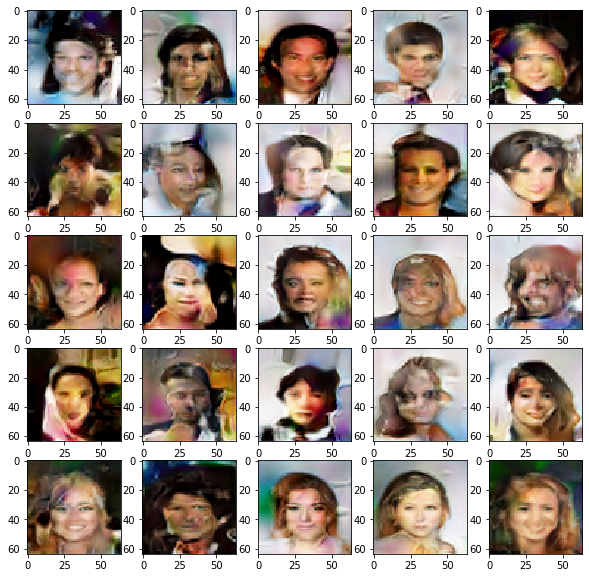

In [12]:
row, col = 5, 5

f, axarr = plt.subplots(row, col, figsize=(10, 10))

for r in range(row):
    for c in range(col):
        images = generator(t.randn(2, z_dim).to(device)).cpu().detach()[0].permute(1, 2, 0)
        axarr[r, c].imshow(images)

 12%|█▏        | 399/3200 [2:01:26<14:21:49, 18.46s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


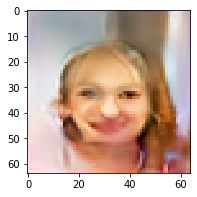

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


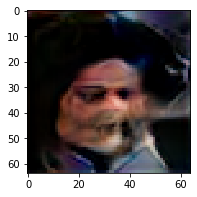

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


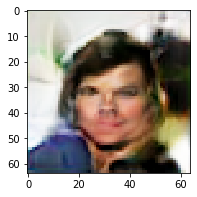

 25%|██▍       | 799/3200 [4:02:53<12:10:09, 18.25s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


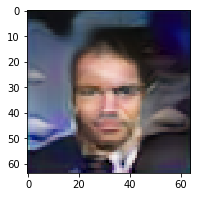

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


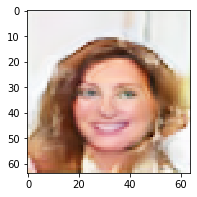

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


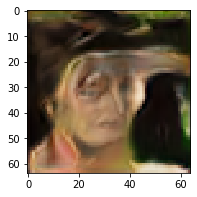

 37%|███▋      | 1199/3200 [6:04:13<10:08:37, 18.25s/it]

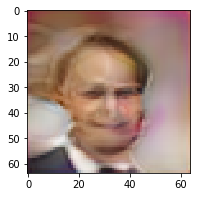

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


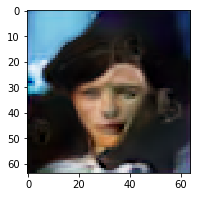

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


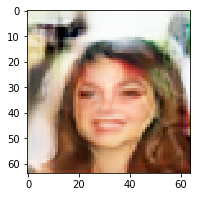

 50%|████▉     | 1599/3200 [8:05:36<8:07:21, 18.26s/it] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


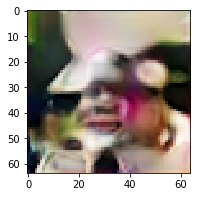

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


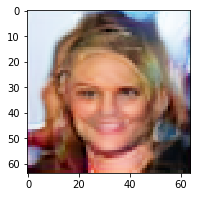

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


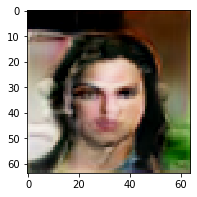

 62%|██████▏   | 1999/3200 [10:06:45<6:01:40, 18.07s/it]

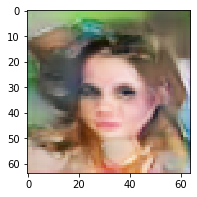

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


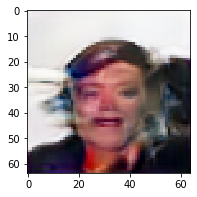

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


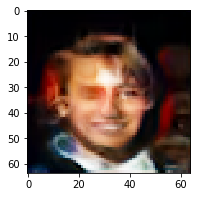

 75%|███████▍  | 2399/3200 [12:07:50<4:02:44, 18.18s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


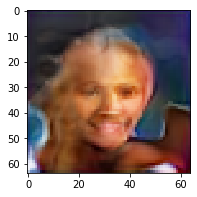

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


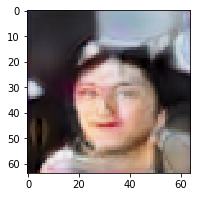

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


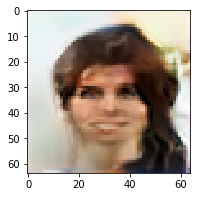

 87%|████████▋ | 2799/3200 [14:09:02<2:01:25, 18.17s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


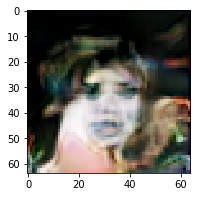

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


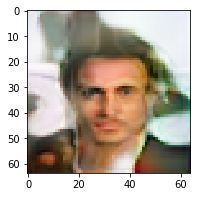

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


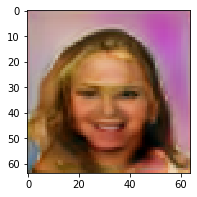

100%|█████████▉| 3199/3200 [16:10:28<00:18, 18.27s/it]  Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


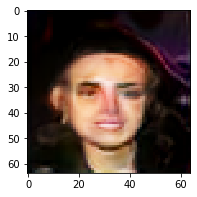

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


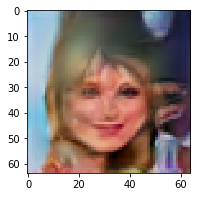

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


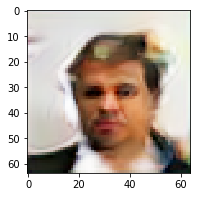

100%|██████████| 3200/3200 [16:10:47<00:00, 18.44s/it]


In [13]:
for epoch in tqdm(range(1, 3201)):
    for i, (imgs, _) in enumerate(dl):
        # train critic
        real_imgs = imgs.to(device)
        randn = t.randn(bs, z_dim)
        gen_imgs = generator(randn.to(device))

        c_opt.zero_grad()
        ri_pred = critic(real_imgs)
        gi_pred = critic(gen_imgs)
        gp = gradient_penalty(critic, real_imgs.data, gen_imgs.data)
        gp_lambda = 10 # hyperparam
        c_loss = -t.mean(ri_pred) + t.mean(gi_pred) + gp_lambda * gp
        c_loss.backward()
        c_opt.step()

        # train generator
        if i % 5 == 0:
            gen_imgs = generator(randn.to(device))
            g_opt.zero_grad()
            gi_critic_pred = critic(gen_imgs)
            g_loss = -t.mean(gi_critic_pred)
            g_loss.backward()
            g_opt.step()

    if epoch % 400 == 0:
        for img in generator(t.randn(3, z_dim).to(device)):
            plot_tensor(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

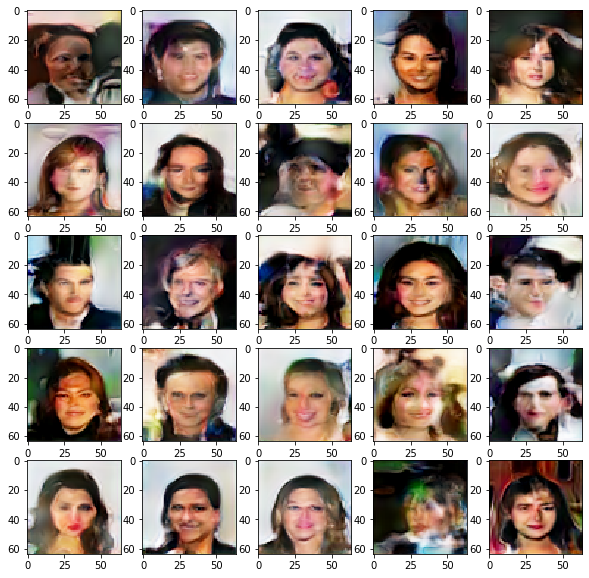

In [14]:
row, col = 5, 5

f, axarr = plt.subplots(row, col, figsize=(10, 10))

for r in range(row):
    for c in range(col):
        images = generator(t.randn(2, z_dim).to(device)).cpu().detach()[0].permute(1, 2, 0)
        axarr[r, c].imshow(images)

In [15]:
t.save(generator.state_dict(), 'models/state_dicts/04_03_face_gen.pth')
t.save(critic.state_dict(), 'models/state_dicts/04_03_face_critic.pth')